In [64]:
# importing libraries and packages
import pandas as pd
import math 
import matplotlib.pyplot as plt
import numpy as np

In [65]:
df = pd.read_excel('C:/Users/shubh/breast-cancer.xlsx')
df

,Class,Age,Menopause,Tumor-size,Inv-nodes,Node-caps,Deg-malig,Breast,Breast-quad,Irradiat
0,no-recurrence-events,30-39,premeno,30-34,0-2,no,3,left,left_low,no
1,no-recurrence-events,40-49,premeno,20-24,0-2,no,2,right,right_up,no
2,no-recurrence-events,40-49,premeno,20-24,0-2,no,2,left,left_low,no
3,no-recurrence-events,60-69,ge40,15-19,0-2,no,2,right,left_up,no
4,no-recurrence-events,40-49,premeno,0-4,0-2,no,2,right,right_low,no
...,...,...,...,...,...,...,...,...,...,...
281,recurrence-events,30-39,premeno,30-34,0-2,no,2,left,left_up,no
282,recurrence-events,30-39,premeno,20-24,0-2,no,3,left,left_up,yes
283,recurrence-events,60-69,ge40,20-24,0-2,no,1,right,left_up,no
284,recurrence-events,40-49,ge40,30-34,3-5,no,3,left,left_low,no


In [66]:
# PART 2 - Identify the attribute for decision node
# calculating entropy of attribute - CLASS
#creating frequency tables

rows = df.count
print(rows)
class_nre = df.loc[df["Class"] =="no-recurrence-events"]
#print(type(class_nre))
print(class_nre.count)
class_re = df.loc[df["Class"] =="recurrence-events"]
print(class_re.count)
freq_table = df.groupby("Class").count()
print(freq_table)

#calculating the entropy of the CLASS attribute
entropy_class = -(((201/286)*(math.log2(201/286)))+((85/286)*(math.log2(85/286))))
print(entropy_class)

<bound method DataFrame.count of                     Class    Age Menopause Tumor-size Inv-nodes Node-caps  \
0    no-recurrence-events  30-39   premeno      30-34       0-2        no   
1    no-recurrence-events  40-49   premeno      20-24       0-2        no   
2    no-recurrence-events  40-49   premeno      20-24       0-2        no   
3    no-recurrence-events  60-69      ge40      15-19       0-2        no   
4    no-recurrence-events  40-49   premeno        0-4       0-2        no   
..                    ...    ...       ...        ...       ...       ...   
281     recurrence-events  30-39   premeno      30-34       0-2        no   
282     recurrence-events  30-39   premeno      20-24       0-2        no   
283     recurrence-events  60-69      ge40      20-24       0-2        no   
284     recurrence-events  40-49      ge40      30-34       3-5        no   
285     recurrence-events  50-59      ge40      30-34       3-5        no   

     Deg-malig Breast Breast-quad Irradiat

In [67]:
# calculating entropy of attribute Age = E(Class, Age)

# frequency count of column Age
print(df['Age'].value_counts())

# Multi-column frequency table
print(df.groupby(["Age", "Class"]).size())
 

#calculating the entropy of the Age attribute
# formula for entropy of attribute with respect to class = P(20-29)E(20-29)+ P(30-39)E(30-39) +... P(70-79)E(70-79)
# The value of log2(0) = 0 using limits hence that value has not been calculated with this formula
entropy_class_age = (((1/286)*(-(((1/1)*math.log2(1/1)))))+((36/286)*(-(((21/36)*math.log2(21/36))+((15/36)*math.log2(15/36)))))+
((90/286)*(-(((63/90)*math.log2(63/90))+((27/90)*math.log2(27/90)))))+((96/286)*(-(((71/96)*math.log2(71/96))+((25/96)*math.log2(25/96)))))+
((57/286)*(-(((40/57)*math.log2(40/57))+((17/57)*math.log2(17/57)))))+
((6/286)*(-(((5/6)*math.log2(5/6))+((1/6)*math.log2(1/6))))))
print(entropy_class_age)

50-59    96
40-49    90
60-69    57
30-39    36
70-79     6
20-29     1
Name: Age, dtype: int64
Age    Class               
20-29  no-recurrence-events     1
30-39  no-recurrence-events    21
       recurrence-events       15
40-49  no-recurrence-events    63
       recurrence-events       27
50-59  no-recurrence-events    71
       recurrence-events       25
60-69  no-recurrence-events    40
       recurrence-events       17
70-79  no-recurrence-events     5
       recurrence-events        1
dtype: int64
0.8672387386390366


In [68]:
# calculating entropy of attribute Menopause = E(Class,Menopause)

# frequency count of column Menopause
print(df['Menopause'].value_counts())

# Multi-column frequency table
print(df.groupby(["Menopause", "Class"]).size())
 
#calculating the entropy of the Menopause attribute
# formula for entropy of attribute with respect to class = P(lt40)E(lt40) +P(ge40)E(ge40) + P(premeno)E(premeno)
entropy_class_Menopause = (((150/286)*(-(((102/150)*math.log2(102/150))+((48/150)*math.log2(48/150)))))+
((129/286)*(-(((94/129)*math.log2(94/129))+((35/129)*math.log2(35/129)))))+
((7/286)*(-(((5/7)*math.log2(5/7))+((2/7)*math.log2(2/7))))))
print(entropy_class_Menopause)

premeno    150
ge40       129
lt40         7
Name: Menopause, dtype: int64
Menopause  Class               
ge40       no-recurrence-events     94
           recurrence-events        35
lt40       no-recurrence-events      5
           recurrence-events         2
premeno    no-recurrence-events    102
           recurrence-events        48
dtype: int64
0.8758430802009389


In [69]:
# calculating entropy of attribute Tumor-size = E(Class,Tumor-size)

# frequency count of column Tumor-size
print(df['Tumor-size'].value_counts())

# Multi-column frequency table
print(df.groupby(["Tumor-size", "Class"]).size())
 
# calculating the entropy of the Tumor-size attribute
# formula for entropy of attribute with respect to class = P(0-4)E(0-4) +P(5-9)E(5-9) +....
# The value of log2(0) = 0 using limits hence that value has not been calculated with this formula
entropy_class_Tumorsize = (((8/286)*(-(((7/8)*math.log2(7/8))+((1/8)*math.log2(1/8)))))+
((4/286)*(-(((4/4)*math.log2(4/4)))))+
((28/286)*(-(((27/28)*math.log2(27/28))+((1/28)*math.log2(1/28)))))+
((30/286)*(-(((23/30)*math.log2(23/30)) +((7/30)*math.log2(7/30)))))+
((50/286)*(-(((34/50)*math.log2(34/50)) +((16/50)*math.log2(16/50)))))+
((54/286)*(-(((36/54)*math.log2(36/54)) +((18/54)*math.log2(18/54)))))+
((60/286)*(-(((35/60)*math.log2(35/60)) +((25/60)*math.log2(25/60)))))+
((19/286)*(-(((12/19)*math.log2(12/19)) +((7/19)*math.log2(7/19)))))+
((22/286)*(-(((16/22)*math.log2(16/22)) +((6/22)*math.log2(6/22)))))+
((3/286)*(-(((1/3)*math.log2(1/3)) +((2/3)*math.log2(2/3)))))+
((8/286)*(-(((5/8)*math.log2(5/8)) +((3/8)*math.log2(3/8))))))
 
print(entropy_class_Tumorsize)

30-34    60
25-29    54
20-24    50
15-19    30
10-14    28
40-44    22
35-39    19
50-54     8
0-4       8
5-9       4
45-49     3
Name: Tumor-size, dtype: int64
Tumor-size  Class               
0-4         no-recurrence-events     7
            recurrence-events        1
10-14       no-recurrence-events    27
            recurrence-events        1
15-19       no-recurrence-events    23
            recurrence-events        7
20-24       no-recurrence-events    34
            recurrence-events       16
25-29       no-recurrence-events    36
            recurrence-events       18
30-34       no-recurrence-events    35
            recurrence-events       25
35-39       no-recurrence-events    12
            recurrence-events        7
40-44       no-recurrence-events    16
            recurrence-events        6
45-49       no-recurrence-events     2
            recurrence-events        1
5-9         no-recurrence-events     4
50-54       no-recurrence-events     5
            recurrence-e

In [70]:
# calculating entropy of attribute Inv-nodes = E(Class,Inv-nodes)

# frequency count of column Tumor-size
print(df['Inv-nodes'].value_counts())

# Multi-column frequency table
print(df.groupby(["Inv-nodes", "Class"]).size())
 
# calculating the entropy of the Inv-nodes attribute
# formula for entropy of attribute with respect to class = P(0-2)E(0-2) +P(3-5)E(3-5) +....
# The value of log2(0) = 0 using limits hence that value has not been calculated with this formula
entropy_class_invnodes = (((213/286)*(-(((167/213)*math.log2(167/213))+((46/213)*math.log2(46/213)))))+
((36/286)*(-(((19/36)*math.log2(19/36))+((17/36)*math.log2(17/36)))))+
((17/286)*(-(((7/17)*math.log2(7/17))+((10/17)*math.log2(10/17)))))+
((10/286)*(-(((4/10)*math.log2(4/10)) +((6/10)*math.log2(6/10)))))+
((6/286)*(-(((3/6)*math.log2(3/6)) +((3/6)*math.log2(3/6)))))+
((3/286)*(-(((1/3)*math.log2(1/3)) +((2/3)*math.log2(2/3)))))+
((1/286)*(-(((1/1)*math.log2(1/1))))))

 
print(entropy_class_invnodes)

0-2      213
3-5       36
6-8       17
9-11      10
15-17      6
12-14      3
24-26      1
Name: Inv-nodes, dtype: int64
Inv-nodes  Class               
0-2        no-recurrence-events    167
           recurrence-events        46
12-14      no-recurrence-events      1
           recurrence-events         2
15-17      no-recurrence-events      3
           recurrence-events         3
24-26      recurrence-events         1
3-5        no-recurrence-events     19
           recurrence-events        17
6-8        no-recurrence-events      7
           recurrence-events        10
9-11       no-recurrence-events      4
           recurrence-events         6
dtype: int64
0.8088496070847645


In [71]:
# calculating entropy of attribute Node-caps = E(Class,Node-caps)

# frequency count of column Node-caps
print(df['Node-caps'].value_counts())

# Multi-column frequency table
print(df.groupby(["Node-caps", "Class"]).size())
 
# calculating the entropy of the Node-caps attribute
# formula for entropy of attribute with respect to class = P(yes)E(yes) + P(no)E(no) 
# The value of log2(0) = 0 using limits hence that value has not been calculated with this formula
entropy_class_nodecaps = (((222/286)*(-(((171/222)*math.log2(171/222))+((51/222)*math.log2(51/222)))))+
((56/286)*(-(((25/56)*math.log2(25/56))+((17/36)*math.log2(17/36))))))
#((8/286)*(-(((5/8)*math.log2(5/8))+((3/8)*math.log2(3/8)))))) 
print(entropy_class_nodecaps)

no     222
yes     56
?        8
Name: Node-caps, dtype: int64
Node-caps  Class               
?          no-recurrence-events      5
           recurrence-events         3
no         no-recurrence-events    171
           recurrence-events        51
yes        no-recurrence-events     25
           recurrence-events        31
dtype: int64
0.8053371629691282


In [72]:
# calculating entropy of attribute Deg-malig = E(Class,Deg-malig)

# frequency count of column Deg-malig
print(df['Deg-malig'].value_counts())

# Multi-column frequency table
print(df.groupby(["Deg-malig", "Class"]).size())
 
# calculating the entropy of the Deg-malig attribute
# formula for entropy of attribute with respect to class = P(1)E(1) + P(2)E(2) +P(3)E(3) 
# The value of log2(0) = 0 using limits hence that value has not been calculated with this formula
entropy_class_degmalig = (((71/286)*(-(((59/71)*math.log2(59/71))+((12/71)*math.log2(12/71)))))+
((130/286)*(-(((102/130)*math.log2(102/130))+((28/130)*math.log2(28/130)))))+
((85/286)*(-(((40/85)*math.log2(40/85))+((45/85)*math.log2(45/85))))))
print(entropy_class_degmalig)

2    130
3     85
1     71
Name: Deg-malig, dtype: int64
Deg-malig  Class               
1          no-recurrence-events     59
           recurrence-events        12
2          no-recurrence-events    102
           recurrence-events        28
3          no-recurrence-events     40
           recurrence-events        45
dtype: int64
0.8008348426580362


In [73]:
# calculating entropy of attribute Breast = E(Class,Breast)

# frequency count of column Breast
print(df['Breast'].value_counts())

# Multi-column frequency table
print(df.groupby(["Breast", "Class"]).size())
 
# calculating the entropy of the Breast attribute
# formula for entropy of attribute with respect to class = P(left)E(left) + P(right)E(right)  
# The value of log2(0) = 0 using limits hence that value has not been calculated with this formula
entropy_class_breast = (((152/286)*(-(((103/152)*math.log2(103/152))+((49/152)*math.log2(49/152)))))+
((134/286)*(-(((98/134)*math.log2(98/134))+((36/134)*math.log2(36/134))))))
print(entropy_class_breast)

left     152
right    134
Name: Breast, dtype: int64
Breast  Class               
left    no-recurrence-events    103
        recurrence-events        49
right   no-recurrence-events     98
        recurrence-events        36
dtype: int64
0.8753557067413851


In [74]:
# calculating entropy of attribute Breast-quad = E(Class,Breast-quad)

# frequency count of column Breast-quad
print(df['Breast-quad'].value_counts())

# Multi-column frequency table
print(df.groupby(["Breast-quad", "Class"]).size())
 
# calculating the entropy of the Breast-quad attribute
# formula for entropy of attribute with respect to class = P(left-up)E(left-up) + P(left-low)E(left-low) +....  
# The value of log2(0) = 0 using limits hence that value has not been calculated with this formula
entropy_class_breastquad = (((110/286)*(-(((75/110)*math.log2(75/110))+((35/110)*math.log2(35/110)))))+
((97/286)*(-(((71/97)*math.log2(71/97))+((26/97)*math.log2(26/97)))))+
((33/286)*(-(((20/33)*math.log2(20/33))+((13/33)*math.log2(13/33)))))+
((24/286)*(-(((18/24)*math.log2(18/24))+((6/24)*math.log2(6/24)))))+
((21/286)*(-(((17/21)*math.log2(17/21))+((4/21)*math.log2(4/21))))))
print(entropy_class_breastquad)

left_low     110
left_up       97
right_up      33
right_low     24
central       21
?              1
Name: Breast-quad, dtype: int64
Breast-quad  Class               
?            recurrence-events        1
central      no-recurrence-events    17
             recurrence-events        4
left_low     no-recurrence-events    75
             recurrence-events       35
left_up      no-recurrence-events    71
             recurrence-events       26
right_low    no-recurrence-events    18
             recurrence-events        6
right_up     no-recurrence-events    20
             recurrence-events       13
dtype: int64
0.8627780731205006


In [75]:
# calculating entropy of attribute irradiat = E(Class,irradiat)

# frequency count of column irradiat
print(df['Irradiat'].value_counts())

# Multi-column frequency table
print(df.groupby(["Irradiat", "Class"]).size())
 
# calculating the entropy of the irradiat attribute
# formula for entropy of attribute with respect to class = P(No)E(No) + P(Yes)E(Yes) 
# The value of log2(0) = 0 using limits hence that value has not been calculated with this formula
entropy_class_irradiat = (((218/286)*(-(((164/218)*math.log2(164/218))+((54/218)*math.log2(54/218)))))+
((68/286)*(-(((37/68)*math.log2(37/68))+((31/68)*math.log2(31/68))))))

print(entropy_class_irradiat)

no     218
yes     68
Name: Irradiat, dtype: int64
Irradiat  Class               
no        no-recurrence-events    164
          recurrence-events        54
yes       no-recurrence-events     37
          recurrence-events        31
dtype: int64
0.8520256712655094


In [76]:
# Step 4: Calculating Information Gain for Each Split
#Gain(S,T) = Entropy(S) – Entropy(S,T)
#Gain(Class, Age) = Entropy(Class) – Entropy(Class, Age)
Gain_age = entropy_class - entropy_class_age
print(Gain_age)
#Gain(Class, Menopause) = Entropy(Class) – Entropy(Class, Menopause)
gain_meno = entropy_class - entropy_class_Menopause
print(gain_meno)
#Gain(Class, Tumor-size) = Entropy(Class) – Entropy(Class, Tumor-size)
gain_tumor = entropy_class - entropy_class_Tumorsize
print(gain_tumor)
#Gain(Class, Inv-nodes) = Entropy(Class) – Entropy(Class, Inv-nodes)
gain_invnode = entropy_class - entropy_class_invnodes
print(gain_invnode)
#Gain(Class, Node-caps) = Entropy(Class) – Entropy(Class, Node-caps)
gain_nodecap = entropy_class - entropy_class_nodecaps
print(gain_nodecap)
#Gain(Class, Deg-malig) = Entropy(Class) – Entropy(Class, Deg-malig)
gain_deg = entropy_class - entropy_class_degmalig
print(gain_deg)
#Gain(Class, Breast) = Entropy(Class) – Entropy(Class, Breast)
gain_breast = entropy_class - entropy_class_breast
print(gain_breast)
#Gain(Class, Breast-quad) = Entropy(Class) – Entropy(Class, Breast-quad)
gain_breastquad = entropy_class - entropy_class_breastquad
print(gain_breastquad)
#Gain(Class, Irradiat) = Entropy(Class) – Entropy(Class, Irradiat)
gain_irradiat = entropy_class - entropy_class_irradiat
print(gain_irradiat)

max_info_gain = 0.07700985251661441 #gain for deg-malig

0.010605956535614025
0.0020016149737116518
0.05717112532429669
0.06899508808988608
0.07250753220552242
0.07700985251661441
0.0024889884332655043
0.015066622054149992
0.025819023909141148


In [77]:
#Step 5: Perform the First Split using Deg_malig
#2) decide how to split the attribute you chose into two subsets.
print(df.groupby(["Deg-malig", "Class"]).size()) # heterogeneous leaf nodes
# Hence, our leaf nodes for this decision tree will be both no-recurrence-events and recurrence-events

Deg-malig  Class               
1          no-recurrence-events     59
           recurrence-events        12
2          no-recurrence-events    102
           recurrence-events        28
3          no-recurrence-events     40
           recurrence-events        45
dtype: int64


Age    Class               
20-29  no-recurrence-events     1
30-39  no-recurrence-events    21
       recurrence-events       15
40-49  no-recurrence-events    63
       recurrence-events       27
50-59  no-recurrence-events    71
       recurrence-events       25
60-69  no-recurrence-events    40
       recurrence-events       17
70-79  no-recurrence-events     5
       recurrence-events        1
dtype: int64


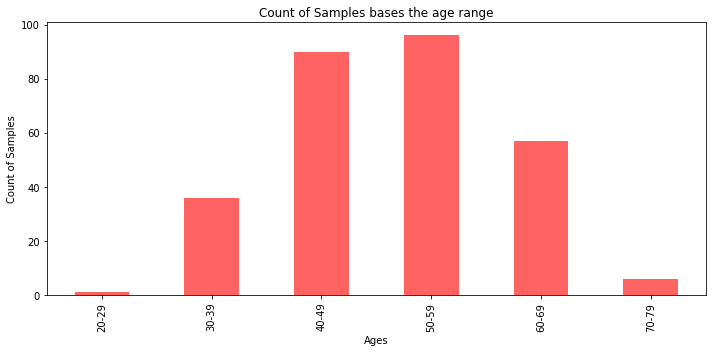

In [78]:
# PART 1 Plot the bar plot of the number of samples in each class for each possible age range.
# Multi-column frequency table
age_df = df.groupby(["Age", "Class"])
print(df.groupby(["Age", "Class"]).size())
ageCount = df.groupby("Age")["Age"].count()
ageCount.plot.bar(figsize=(10,5), color="#ff6361")
plt.ylabel('Count of Samples')
plt.xlabel('Ages')
plt.title('Count of Samples bases the age range')
plt.tight_layout()

In [79]:
print(df.groupby(["Age", "Class"]).size())

Age    Class               
20-29  no-recurrence-events     1
30-39  no-recurrence-events    21
       recurrence-events       15
40-49  no-recurrence-events    63
       recurrence-events       27
50-59  no-recurrence-events    71
       recurrence-events       25
60-69  no-recurrence-events    40
       recurrence-events       17
70-79  no-recurrence-events     5
       recurrence-events        1
dtype: int64


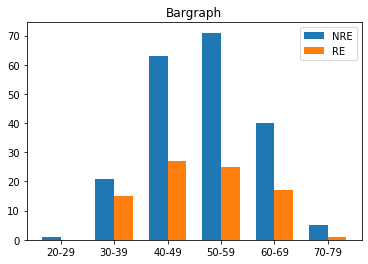

In [80]:
N = 6
nre = (1,21,63,71,40,5)

fig, ax = plt.subplots()

ind = np.arange(N)    # the x locations for the groups
width = 0.35         # the width of the bars
p1 = ax.bar(ind, nre, width)


re = (0,15,27,25,17,1)
p2 = ax.bar(ind + width, re, width)

ax.set_title('Bargraph')
ax.set_xticks(ind + width / 2)
ax.set_xticklabels(('20-29', '30-39', '40-49', '50-59', '60-69', '70-79'))

ax.legend((p1[0], p2[0]), ('NRE', 'RE'))
#ax.yaxis.set_units(inch)
ax.autoscale_view()

plt.show()

In [81]:
#PART 3 3.	[20 Points] Suppose we decide to split on the attribute you selected above into two partitions, please use Gini Index to decide the best partitions. Which two subsets did you choose to split the attribute into? What is the gini index of such partition (round to 3 decimal places)? Write your answer below in your .pdf file.
#calculate the gini index of CLASS
# GINI(D) = 1-(Sum of square of relative frequencies of class j in D)


gini_index_class = 1- (((201/286)**2) + ((85/286)**2))
print(gini_index_class)
partitions = 2
print(df.groupby(["Deg-malig", "Class"]).size())
# potnetial partition  #1 deg_malig = (1,2) and deg_malig = (3)
gini_1_2 = (((201/286)*(1-((161/201)**2)-((40/201)**2))) + ((85/286)*(1-((40/85)**2)-((45/85)**2))))
print(gini_1_2)


# potnetial partition  #1 deg_malig = (2,3) and deg_malig = (1)
gini_2_3 = (((215/286)*(1-((142/215)**2)-((73/215)**2))) + ((71/286)*(1-((59/71)**2)-((12/71)**2))))
print(gini_2_3)


# potnetial partition  #1 deg_malig = (1,3) and deg_malig = 2
gini_1_3 = (((156/286)*(1-((99/156)**2)-((57/156)**2))) + ((130/286)*(1-((102/130)**2)-((38/130)**2))))
print(gini_1_3) 
#hence, min_gini = 0.372 because this is the lowestn
#hence the partition should on (1,2) and (3)
#our 2 subsets will be deg_malig =(1,2) and deg_maig= (3)


0.4177465890752604
Deg-malig  Class               
1          no-recurrence-events     59
           recurrence-events        12
2          no-recurrence-events    102
           recurrence-events        28
3          no-recurrence-events     40
           recurrence-events        45
dtype: int64
0.3721417593234977
0.40689359772229083
0.3888380849919312


In [82]:
final_gini = round(gini_1_2,3)
print(final_gini)

0.372
